#### Load the data in pandas dataframe

#### Display first few rows

#### Perform pandas profiling 

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [1]:
df=pd.read_csv('Consumo_cerveja.csv')

df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
pip install --user markupsafe==2.0.1

#this is the stable version of markupsafe. needs to be downgraded to this version in order to be compatible with sweetviz. you also might need user permission hence use the --user .

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sweetviz as sv
#You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
my_report = sv.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


As the data is not in proper format. We need to rectify this data by replacing ',' with '.' 

In [3]:
df['Temperatura Media (C)']=df['Temperatura Media (C)'].str.replace(',','.')
df['Temperatura Minima (C)']=df['Temperatura Minima (C)'].str.replace(',','.')
df['Temperatura Maxima (C)']=df['Temperatura Maxima (C)'].str.replace(',','.')
df['Precipitacao (mm)']=df['Precipitacao (mm)'].str.replace(',','.')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [4]:
#next we are gonna build some new features around the datasets.
#creating new feature 'Month', 'Day', from the dates consisting of the month of the year and day of the week respectively
#Then we set 'Data' Column as indexes

In [7]:

df['Data']=pd.to_datetime(df['Data'],errors='coerce')

#this is done to avoid attribute error. AttributeError: Can only use .dt accessor with datetimelike values.
# why this has happened is because to_datetime silently failed so the dtype remained as str/object,
# if you set param errors='coerce' then if the conversion fails for any particular string then those rows are set to NaT.

In [8]:
df['Month']=df.Data.dt.month
df['Day']=df.Data.dt.dayofweek

In [9]:
df.iloc[335:341]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
335,2015-12-02,22.1,18.2,29.4,0,0.0,30.471,12.0,2.0
336,2015-12-03,22.44,20.2,26.1,0,0.0,28.405,12.0,3.0
337,2015-12-04,22.76,19,29.1,0,0.0,29.513,12.0,4.0
338,2015-12-05,24.8,19.5,30.6,0.1,1.0,32.451,12.0,5.0
339,2015-12-06,23.12,20.6,28,0.1,1.0,32.780,12.0,6.0
340,2015-12-07,20.04,18,23.9,47.8,0.0,23.375,12.0,0.0


In [10]:
df.set_index('Data',inplace=True)

In [15]:
#next we need to handle the null values and also check for duplicates
print(df.isnull().sum())
print('Dataset shape is :',df.shape)

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
Day                            576
dtype: int64
Dataset shape is : (941, 8)


In [16]:
#next we check the number of row which have null values in all columns

df.isnull().all(axis=1).sum()

576

As we can see 576 instances have null values in all columns so we are going to drop those rows

In [17]:
df.dropna(how='all',inplace=True)
df.shape

(365, 8)

In [18]:
df.isnull().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64

Now we can see that there are no null values

In [19]:
#checking for duplicates

if df.duplicated().any():
    print('There are duplicates')
else:
    print('There are no duplicates')


There are no duplicates


Now we handle data types of each features. Converting them to appropriate data types 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   Day                          365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


In [21]:
df['Temperatura Media (C)']=df['Temperatura Media (C)'].astype(float)
df['Temperatura Minima (C)']=df['Temperatura Minima (C)'].astype(float)
df['Temperatura Maxima (C)']=df['Temperatura Maxima (C)'].astype(float)
df['Precipitacao (mm)']=df['Precipitacao (mm)'].astype(float)

#final de semana is categorical hence it has to be interger type
df['Final de Semana']=df['Final de Semana'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int32  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    float64
 7   Day                          365 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 24.2 KB


In [24]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0


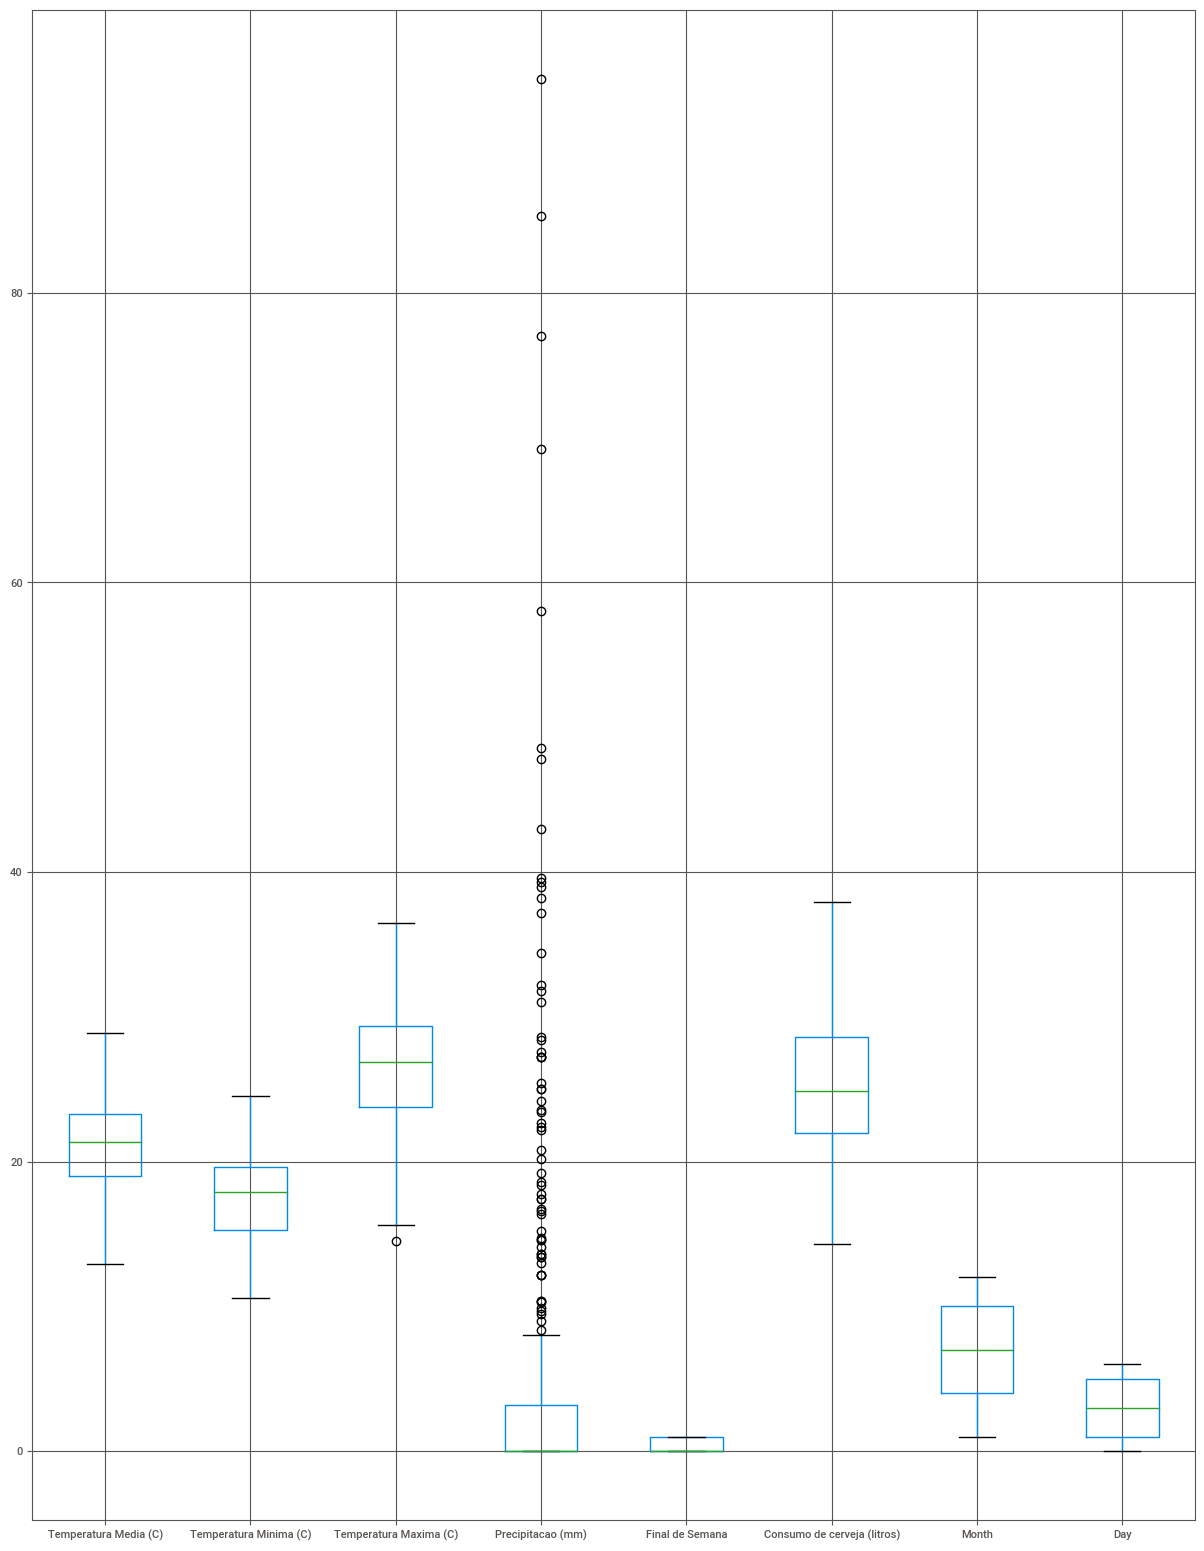

In [29]:
df.boxplot(figsize=(15,20))
plt.show()

Column 'Precioiacao' seems to have lots of outliers. Let's try to understand this using the distribution of the data

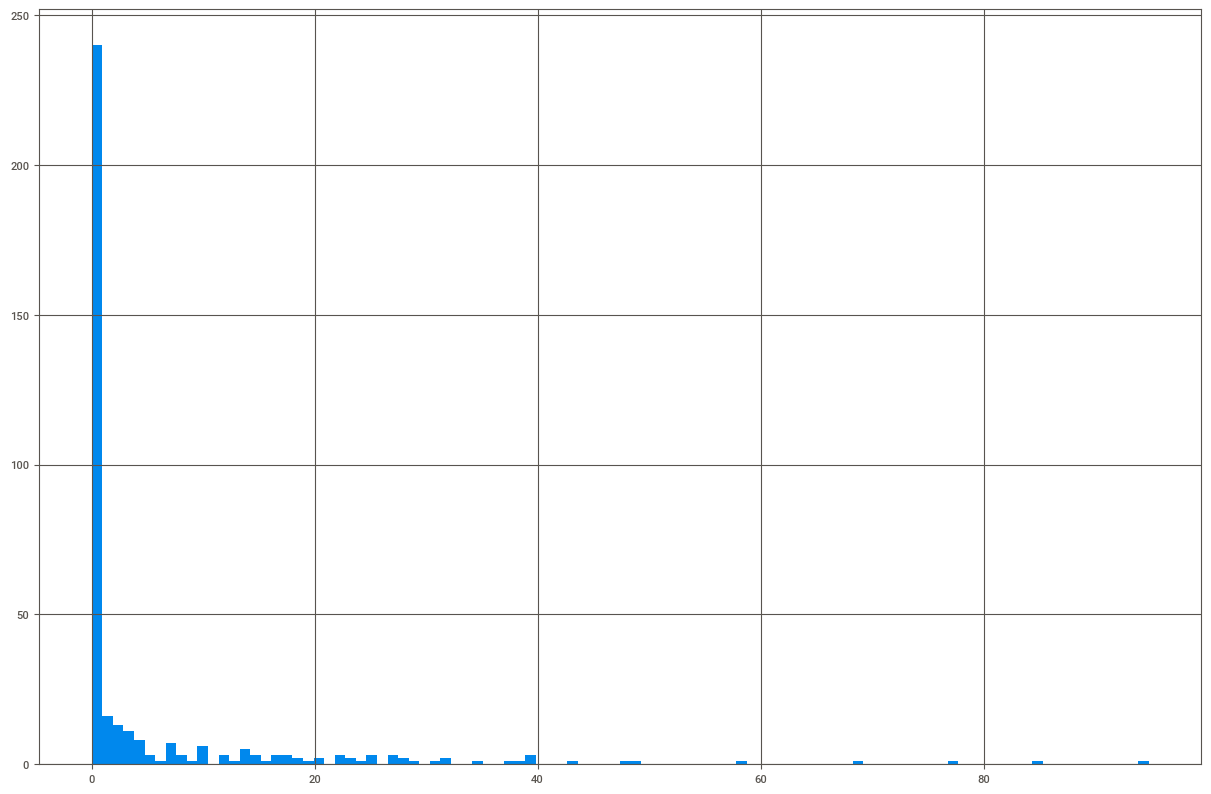

In [33]:
df['Precipitacao (mm)'].hist(bins=100,figsize=(15,10))
plt.show()

In [35]:
df['Precipitacao (mm)'][df['Precipitacao (mm)']==0].value_counts()

0.0    218
Name: Precipitacao (mm), dtype: int64

We can see out of 365, 218 values are 0

We can see how the data is largely skewed, thus having so many outliers. It can also be possible that the values with 0 percipiation are the instance where percipitation are not recorded. Let's clip all the values over 40 in column 'Precipiacao (mm)' to 40

In [37]:
df['Precipitacao (mm)']=np.clip(df['Precipitacao (mm)'],0,40)

<AxesSubplot:>

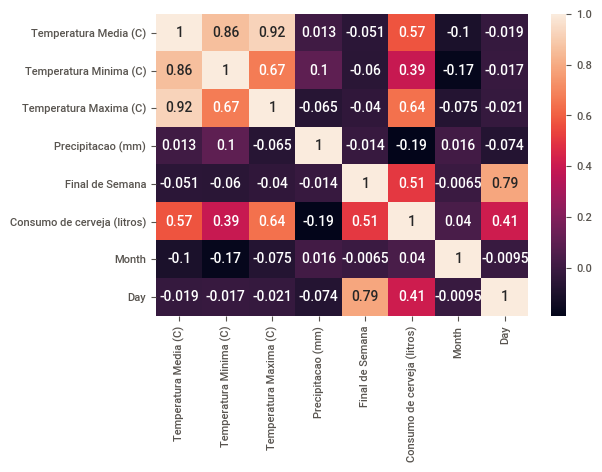

In [41]:
#we calculate the correlation between features
correlation = df.corr()
sns.heatmap(correlation,annot=True)

All the features are showing high correlation with the output feature except 'Month' feature. In case of 'Precipitao (mm)' feature, which
has lots of values as 0, still it is showing quite good correlation, so we will keep it. 

In [44]:
#now we split the data to train and validate

x=df.drop(columns=['Consumo de cerveja (litros)'],axis=1)
y=df['Consumo de cerveja (litros)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=111)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 7)
(92, 7)
(273,)
(92,)


In [46]:
#train the model using linear regression

lr=LinearRegression()
lr.fit(x_train,y_train)
print('The final coefficient after training is: ',lr.coef_)
print('The final intercept after training is: ',lr.intercept_)

The final coefficient after training is:  [-0.19385668  0.13948575  0.73524416 -0.06388687  4.94525017  0.13870185
  0.00937361]
The final intercept after training is:  5.427497925291917


In [49]:
#Finally we evaluate the model by calculating the R2 score, Mean Absolute Error and Root Mean Squared Error

y_pred = lr.predict(x_test)

print("r2 score of our model is: ", r2_score(y_test,y_pred))
print("Mean absolute error of the mode is: ",mean_absolute_error(y_test,y_pred))
print('Mean squared error of our model is: ',mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is:  0.7220903208690853
Mean absolute error of the mode is:  1.9603459791880382
Mean squared error of our model is:  2.302652634576646
